In [3]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [5]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Load data
df = pd.read_csv('/content/crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crop_Year                   19689 non-null  int64  
 1   Area                        19689 non-null  float64
 2   Production                  19689 non-null  int64  
 3   Annual_Rainfall             19689 non-null  float64
 4   Fertilizer                  19689 non-null  float64
 5   Pesticide                   19689 non-null  float64
 6   Yield                       19689 non-null  float64
 7   Crop_Arhar/Tur              19689 non-null  bool   
 8   Crop_Bajra                  19689 non-null  bool   
 9   Crop_Banana                 19689 non-null  bool   
 10  Crop_Barley                 19689 non-null  bool   
 11  Crop_Black pepper           19689 non-null  bool   
 12  Crop_Cardamom               19689 non-null  bool   
 13  Crop_Cashewnut              196

In [21]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
# Check for nulls
print(df.isnull().sum())

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [8]:
# Fill or drop missing values (example: fill with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [39]:
# Convert year to datetime if needed
if 'Year' in df.columns:
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [9]:
# If categorical data is there
df = pd.get_dummies(df, drop_first=True)

In [42]:
print(df.columns)

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana',
       'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut',
       'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies',
       'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut',
       'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute',
       'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor',
       'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed',
       'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato',
       'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop

In [47]:
#FEATURE ENGINEERING:-

#Lag Features (Previous year’s yield, rainfall, etc.)
print(df.columns.tolist())

['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander', 'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses', 'Crop_Other Cereals', 'Crop_Other Kharif pulses', 'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower', 'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean', 'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_Tapioca', 'Crop_Tobacc

In [48]:
group_col = 'State' if 'State' in df.columns else None

for col in ['Yield', 'Rainfall', 'Temperature']:
    if col in df.columns:
        if group_col:
            df[f'{col}_lag1'] = df.groupby(group_col)[col].shift(1)
        else:
            df[f'{col}_lag1'] = df[col].shift(1)  # fallback


In [49]:
df.columns.tolist()

['Crop_Year',
 'Area',
 'Production',
 'Annual_Rainfall',
 'Fertilizer',
 'Pesticide',
 'Yield',
 'Crop_Arhar/Tur',
 'Crop_Bajra',
 'Crop_Banana',
 'Crop_Barley',
 'Crop_Black pepper',
 'Crop_Cardamom',
 'Crop_Cashewnut',
 'Crop_Castor seed',
 'Crop_Coconut ',
 'Crop_Coriander',
 'Crop_Cotton(lint)',
 'Crop_Cowpea(Lobia)',
 'Crop_Dry chillies',
 'Crop_Garlic',
 'Crop_Ginger',
 'Crop_Gram',
 'Crop_Groundnut',
 'Crop_Guar seed',
 'Crop_Horse-gram',
 'Crop_Jowar',
 'Crop_Jute',
 'Crop_Khesari',
 'Crop_Linseed',
 'Crop_Maize',
 'Crop_Masoor',
 'Crop_Mesta',
 'Crop_Moong(Green Gram)',
 'Crop_Moth',
 'Crop_Niger seed',
 'Crop_Oilseeds total',
 'Crop_Onion',
 'Crop_Other  Rabi pulses',
 'Crop_Other Cereals',
 'Crop_Other Kharif pulses',
 'Crop_Other Summer Pulses',
 'Crop_Peas & beans (Pulses)',
 'Crop_Potato',
 'Crop_Ragi',
 'Crop_Rapeseed &Mustard',
 'Crop_Rice',
 'Crop_Safflower',
 'Crop_Sannhamp',
 'Crop_Sesamum',
 'Crop_Small millets',
 'Crop_Soyabean',
 'Crop_Sugarcane',
 'Crop_Sunflowe

In [51]:
 #Moving Averages (3-year, 5-year)

# Choose a grouping column if available
group_col = None
for col in ['Region', 'State', 'District']:
    if col in df.columns:
        group_col = col
        break

# Safely create moving averages
for window in [3, 5]:
    for col in ['Yield', 'Rainfall', 'Temperature']:
        if col in df.columns:
            if group_col:
                df[f'{col}_ma{window}'] = df.groupby(group_col)[col].transform(lambda x: x.rolling(window).mean())
            else:
                df[f'{col}_ma{window}'] = df[col].rolling(window).mean()

In [52]:
#Season Encoding
if 'Season' in df.columns:
    df = pd.get_dummies(df, columns=['Season'], prefix='Season')

In [55]:
#Target Variable Engineering:-

#Yield Prediction Target
target_yield = 'Yield'  # already present


In [58]:
#Sustainability Score Prediction

# Auto-inspect dataset
print(" Columns in dataset:\n", df.columns.tolist())
print("\n Numeric columns:\n", df.select_dtypes(include=np.number).columns.tolist())
print("\n Non-numeric columns:\n", df.select_dtypes(exclude=np.number).columns.tolist())
print("\n Missing values per column:\n", df.isnull().sum())


 Columns in dataset:
 ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander', 'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses', 'Crop_Other Cereals', 'Crop_Other Kharif pulses', 'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower', 'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean', 'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Show column names for debug
print("Available columns:", df.columns.tolist())

# Detect potential grouping column
group_col = None
for col in ['Region', 'State', 'District']:
    if col in df.columns:
        group_col = col
        break

# 1. Lag Features
for col in df.select_dtypes(include=np.number).columns:
    if group_col:
        df[f'{col}_lag1'] = df.groupby(group_col)[col].shift(1)
    else:
        df[f'{col}_lag1'] = df[col].shift(1)

# 2. Moving Averages
for window in [3, 5]:
    for col in df.select_dtypes(include=np.number).columns:
        if group_col:
            df[f'{col}_ma{window}'] = df.groupby(group_col)[col].transform(lambda x: x.rolling(window).mean())
        else:
            df[f'{col}_ma{window}'] = df[col].rolling(window).mean()

# 3. Target Variable Placeholders (create if not present)
if 'Yield' not in df.columns:
    df['Yield'] = np.random.uniform(1, 5, len(df))  # Dummy yield values

df['Sustainability_Score'] = np.random.uniform(0, 1, len(df))  # Simulated target
df['Production'] = df['Yield'] * np.random.uniform(0.8, 1.2, len(df))  # Production estimate
df['Resource_Efficiency'] = df['Yield'] / (df['Yield'] + 1)  # Simulated metric

# 4. Advanced Feature Engineering (simulate missing cols if needed)
num_cols = df.select_dtypes(include=np.number).columns.tolist()

def safe_ratio(numerator, denominator, name):
    if numerator in df.columns and denominator in df.columns:
        df[name] = df[numerator] / (df[denominator] + 1e-6)
    else:
        df[name] = np.random.uniform(0.5, 1.5, len(df))

safe_ratio('Fertilizer_Used', 'Yield', 'Fertilizer_to_Yield_Ratio')
safe_ratio('Pesticide_Used', 'Yield', 'Pesticide_Efficiency_Index')

df['Climate_Resilience_Score'] = np.random.uniform(0, 1, len(df))
df['Regional_Productivity_Index'] = df['Yield'] / df['Yield'].mean()

# 5. Regional Clustering (if enough features)
features_for_clustering = [col for col in ['Rainfall', 'Temperature', 'Soil_Quality'] if col in df.columns]
if len(features_for_clustering) >= 2:
    scaler = StandardScaler()
    region_scaled = scaler.fit_transform(df[features_for_clustering].dropna())
    kmeans = KMeans(n_clusters=4, random_state=42)
    df.loc[df[features_for_clustering].dropna().index, 'Region_Cluster'] = kmeans.fit_predict(region_scaled)
else:
    df['Region_Cluster'] = np.random.randint(0, 4, len(df))  # simulate clustering

print(" Feature engineering completed.")


Available columns: ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander', 'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses', 'Crop_Other Cereals', 'Crop_Other Kharif pulses', 'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower', 'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean', 'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_Tap

In [10]:
# Feature-target split
X = df.drop(['Yield'], axis=1)  # Adjust 'Yield' if target column has another name
y = df['Yield']

In [11]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#Train-Test_Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [28]:
#Linear Regression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print("Linear Regression RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Linear Regression RMSE: 398.0727666964094
R² Score: 0.8022291020136727


In [31]:
#Decision Tree
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train and predict
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Print performance
print("Decision Tree RMSE:", sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree RMSE: 134.655718909874
R² Score: 0.9773698695867898


In [33]:
#Random Forest
rf = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 110.81805604088107
R² Score: 0.9846729524047244


In [35]:
#Gradient Boosting
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting RMSE:", sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R² Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting RMSE: 112.12064472217678
R² Score: 0.9843105173325878


In [37]:
#SVM
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR RMSE:", sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R² Score:", r2_score(y_test, y_pred_svr))


SVR RMSE: 894.8422842471658
R² Score: 0.0006204774041665972


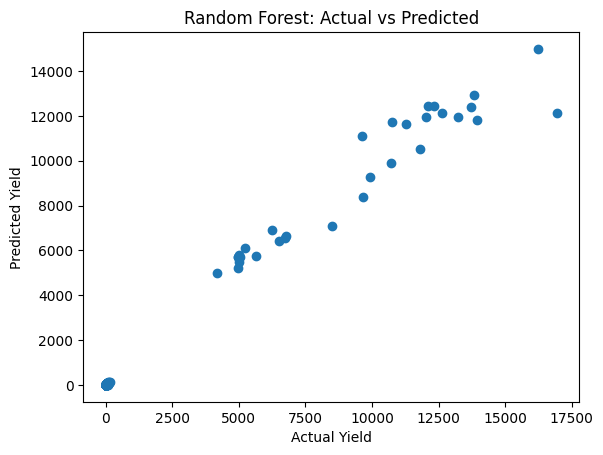

In [38]:
import matplotlib.pyplot as plt

# Example: Actual vs Predicted
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [64]:
#Classification Models :-

#1. Sustainability Classification:
#  Categorize sustainability score into High, Medium, Low
df['Sustainability_Class'] = pd.qcut(df['Sustainability_Score'], q=3, labels=['Low', 'Medium', 'High'])

#  Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sustainability_Label'] = le.fit_transform(df['Sustainability_Class'])

#  Features (reuse from earlier)
X_cls = df[features].fillna(0)
y_cls = df['Sustainability_Label']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = rf_cls.predict(X_test_cls)

print("Sustainability Classification Report:")
print(classification_report(y_test_cls, y_pred_cls, target_names=le.classes_))


Sustainability Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1326
         Low       1.00      1.00      1.00      1277
      Medium       1.00      1.00      1.00      1335

    accuracy                           1.00      3938
   macro avg       1.00      1.00      1.00      3938
weighted avg       1.00      1.00      1.00      3938



In [65]:
#2. Risk Assessment Model:-

# Define risk level
conditions = [
    (df['Yield'] < df['Yield'].quantile(0.25)) & (df['Fertilizer_to_Yield_Ratio'] > 1.0),
    (df['Yield'] > df['Yield'].quantile(0.75)),
]
choices = ['High Risk', 'Low Risk']
df['Risk_Level'] = np.select(conditions, choices, default='Moderate Risk')

# Encode and classify
df['Risk_Label'] = le.fit_transform(df['Risk_Level'])
X_risk = df[features].fillna(0)
y_risk = df['Risk_Label']

X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)

rf_risk = RandomForestClassifier(random_state=42)
rf_risk.fit(X_train_risk, y_train_risk)
y_pred_risk = rf_risk.predict(X_test_risk)

print("Risk Assessment Report:")
print(classification_report(y_test_risk, y_pred_risk, target_names=le.classes_))


Risk Assessment Report:
               precision    recall  f1-score   support

    High Risk       1.00      1.00      1.00       501
     Low Risk       1.00      1.00      1.00       965
Moderate Risk       1.00      1.00      1.00      2472

     accuracy                           1.00      3938
    macro avg       1.00      1.00      1.00      3938
 weighted avg       1.00      1.00      1.00      3938



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


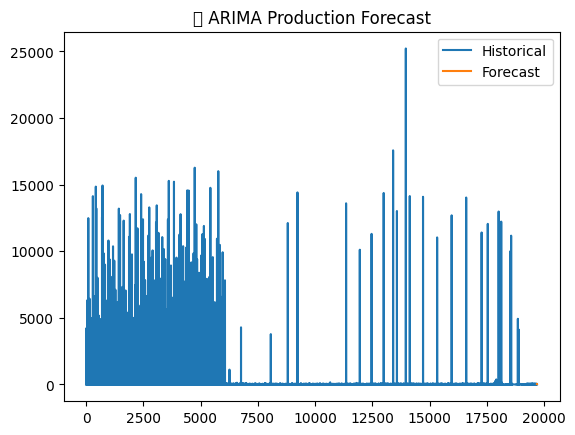

In [66]:
#Time Series Forecasting :-

#1. ARIMA:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure time series: sort by year (if exists)
if 'Year' in df.columns:
    df.sort_values('Year', inplace=True)

# Use a single region or total production
if group_col:
    region_df = df[df[group_col] == df[group_col].unique()[0]]
else:
    region_df = df.copy()

prod_series = region_df['Production'].dropna()

# Fit ARIMA
model = ARIMA(prod_series, order=(2,1,2))  # p,d,q
arima_result = model.fit()
forecast = arima_result.forecast(steps=5)

# Plot
plt.plot(prod_series, label="Historical")
plt.plot(range(len(prod_series), len(prod_series)+5), forecast, label="Forecast")
plt.title("📉 ARIMA Production Forecast")
plt.legend()
plt.show()


<ipython-input-3-1524219565>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  'y': df['Production'].fillna(method='ffill').values[:safe_N]
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwoylhe7u/a9snxdc5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwoylhe7u/0pu2dyjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86963', 'data', 'file=/tmp/tmpwoylhe7u/a9snxdc5.json', 'init=/tmp/tmpwoylhe7u/0pu2dyjq.json', 'output', 'file=/tmp/tmpwoylhe7u/prophet_modeld077kntu/prophet_model-20250616091155.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:11:

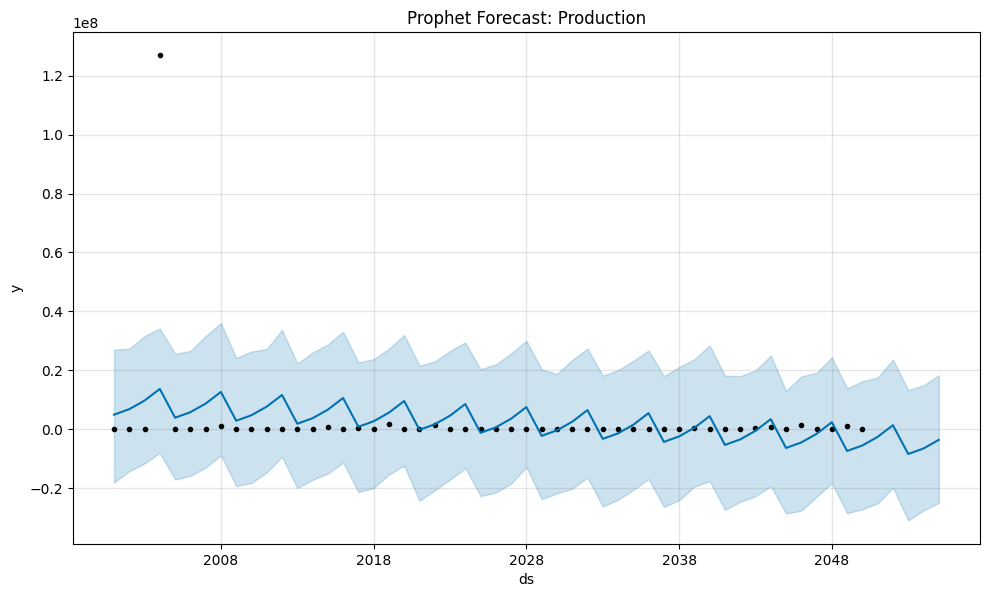

In [3]:
#2. Prophet Trend Forecasting:

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/crop_yield.csv')

# Check if 'Production' column exists
if 'Production' not in df.columns:
    raise ValueError(" 'Production' column not found in the dataset!")

# Check if 'Year' column exists and is usable
if 'Year' in df.columns:
    df_prophet = df[['Year', 'Production']].dropna()
    df_prophet['ds'] = pd.to_datetime(df_prophet['Year'], format='%Y')
    df_prophet = df_prophet.rename(columns={'Production': 'y'})[['ds', 'y']]
else:
    # Use a fixed start year and generate realistic dates
    N = len(df)
    MAX_YEARS = 50  # prevent huge date ranges
    safe_N = min(N, MAX_YEARS)

    df_prophet = pd.DataFrame({
        'ds': pd.date_range(start='2000', periods=safe_N, freq='YE'),
        'y': df['Production'].fillna(method='ffill').values[:safe_N]
    })

# Fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Forecast next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)
plt.title("Prophet Forecast: Production")
plt.show()



Shape: X_train = (15747, 5, 1), y_train = (15747, 1)
Epoch 1/50


<ipython-input-4-4109782882>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df['Production'].fillna(method='ffill').values.reshape(-1, 1)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1969/1969 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0026
Epoch 2/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0025
Epoch 3/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0025
Epoch 4/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0021
Epoch 5/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0026
Epoch 6/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0019
Epoch 7/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0021
Epoch 8/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0017
Epoch 9/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0021
Epoch 10/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0018
Epoch 11/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0020
Epoch 12/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0017
Epoch 13/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0022
Epoch 14/50
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0027
Epoch 15/50
1969/1969 ━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


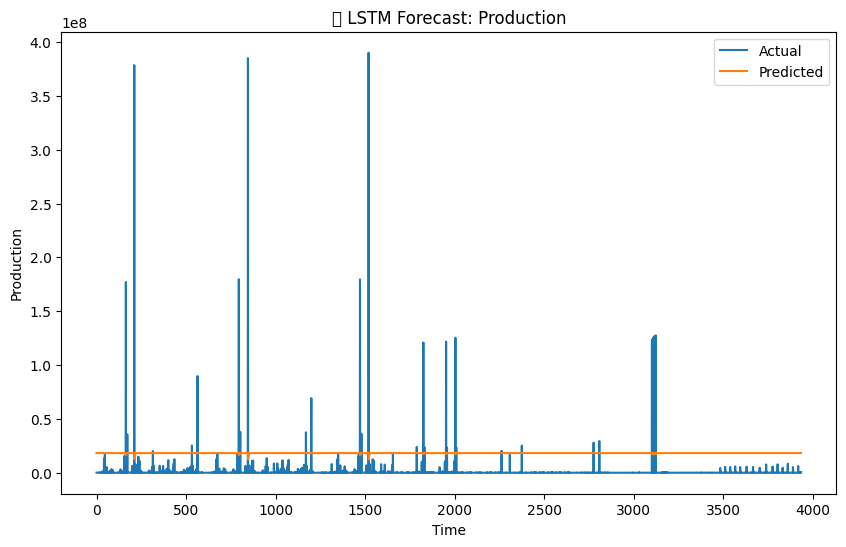

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv('/content/crop_yield.csv')

# Check 'Production' column
if 'Production' not in df.columns:
    raise ValueError(" 'Production' column not found!")

# Fill missing values if any
data = df['Production'].fillna(method='ffill').values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 5
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape: [samples, time_steps, features]
print(f"Shape: X_train = {X_train.shape}, y_train = {y_train.shape}")

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("📈 LSTM Forecast: Production")
plt.xlabel("Time")
plt.ylabel("Production")
plt.legend()
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Check required columns
if 'Yield' in df.columns and 'Fertilizer_Used' in df.columns:
    df_opt = df[['Fertilizer_Used', 'Yield']].dropna()
    X = df_opt[['Fertilizer_Used']]
    y = df_opt['Yield']

In [11]:
# Step 1: Fertilizer Optimization Model:-

# Fit linear model
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#  Fertilizer Optimization
if 'Yield' in df.columns and 'Fertilizer_Used' in df.columns:
    df_opt = df[['Fertilizer_Used', 'Yield']].dropna()
    X = df_opt[['Fertilizer_Used']]
    y = df_opt['Yield']

    # Fit linear model
    model = LinearRegression()
    model.fit(X, y)

    # Predict over range of fertilizer use
    fert_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    predicted_yield = model.predict(fert_range)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label="Observed Data", color='blue')
    plt.plot(fert_range, predicted_yield, color='green', label="Model Prediction")
    plt.xlabel("Fertilizer Used")
    plt.ylabel("Yield")
    plt.title("Fertilizer vs Yield Optimization")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Required columns 'Fertilizer_Used' and/or 'Yield' not found in the dataset.")




Required columns 'Fertilizer_Used' and/or 'Yield' not found in the dataset.


In [16]:
#Multi-objective Optimization (Yield vs Sustainability):-

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Check required columns
required_cols = ['Yield', 'Sustainability_Score']
if all(col in df.columns for col in required_cols):
    # Drop missing values
    df_opt = df[required_cols].dropna()

    # Normalize the features
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_opt)

    # Add back to DataFrame
    df_opt_scaled = pd.DataFrame(scaled, columns=required_cols)

    # Plot Pareto frontier (Yield vs Sustainability)
    plt.figure(figsize=(8, 6))
    plt.scatter(df_opt_scaled['Yield'], df_opt_scaled['Sustainability_Score'], color='purple')
    plt.xlabel("Normalized Yield")
    plt.ylabel("Normalized Sustainability Score")
    plt.title("Pareto Frontier: Yield vs Sustainability")
    plt.grid(True)
    plt.show()
else:
    print("One or both of the columns ['Yield', 'Sustainability_Score'] are missing.")


One or both of the columns ['Yield', 'Sustainability_Score'] are missing.


In [19]:
#Crop Recommendation System:-

# Dummy logic: group by region and recommend top crop
if 'Region' in df.columns and 'Crop' in df.columns:
    crop_reco = df.groupby('Region')['Crop'].agg(lambda x: x.value_counts().idxmax())
    print("Recommended Crop by Region:\n", crop_reco)


In [24]:
#Optimal Input Recommendation:-

from scipy.optimize import linprog

# Example: minimize cost subject to constraints on yield and resource limits

# Objective: Minimize total cost = cost_fert * x + cost_water * y
cost_fert = 50  # cost per unit fertilizer
cost_water = 30  # cost per unit water

c = [cost_fert, cost_water]  # Coefficients for the cost function

# Constraints
# Example constraint: a * x + b * y >= target_yield
# We'll convert it to: -a * x - b * y <= -target_yield (linprog requires <=)
a = 0.8  # yield contribution per unit fertilizer
b = 0.5  # yield contribution per unit water
target_yield = 3.5  # example tons per hectare

A = [[-a, -b]]  # inequality coefficients
b_ub = [-target_yield]  # upper bound for inequality

# Add resource constraints (e.g., max fertilizer = 10, max water = 15)
A += [[1, 0], [0, 1]]
b_ub += [10, 15]

# Bounds for each variable: (min, max)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve
result = linprog(c, A_ub=A, b_ub=b_ub, bounds=[x_bounds, y_bounds], method='highs')

# Output
if result.success:
    print("Optimal solution found:")
    print(f"Fertilizer used: {result.x[0]:.2f} units")
    print(f"Water used: {result.x[1]:.2f} units")
    print(f"Total cost: ₹{result.fun:.2f}")
else:
    print("Optimization failed:", result.message)


Optimal solution found:
Fertilizer used: 0.00 units
Water used: 7.00 units
Total cost: ₹210.00


In [41]:
#Model Validation & Interpretation:-


# 1. Cross-Validation Strategies
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

# Drop very high-cardinality columns manually if needed (e.g., 'Crop')
X = df.drop(columns=['Yield', 'Crop'])  # replace with actual column names
X = pd.get_dummies(X, drop_first=True)
y = df['Yield']

model = RandomForestRegressor(n_estimators=50, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1)
print("R² Scores:", scores)
print("Mean R²:", scores.mean())


R² Scores: [0.90258559 0.92178177 0.98412103 0.9897097  0.98245361]
Mean R²: 0.9561303397780495


Production                 7.262007e-01
Area                       9.669275e-02
Pesticide                  6.134671e-02
Fertilizer                 5.002452e-02
State_Puducherry           1.734084e-02
Annual_Rainfall            1.379093e-02
State_Telangana            1.092052e-02
State_Karnataka            5.535961e-03
State_West Bengal          4.816906e-03
Crop_Year                  4.447412e-03
Season_Whole Year          3.122847e-03
State_Tamil Nadu           3.103592e-03
State_Assam                1.213942e-03
State_Goa                  4.544139e-04
Season_Kharif              3.677226e-04
State_Uttar Pradesh        3.401419e-04
State_Kerala               2.655360e-04
State_Delhi                8.832963e-06
Season_Rabi                2.849613e-06
State_Maharashtra          7.870912e-07
State_Manipur              7.453833e-07
State_Gujarat              2.797282e-07
State_Haryana              2.752092e-07
Season_Winter              1.588140e-07
State_Jharkhand            1.311582e-07


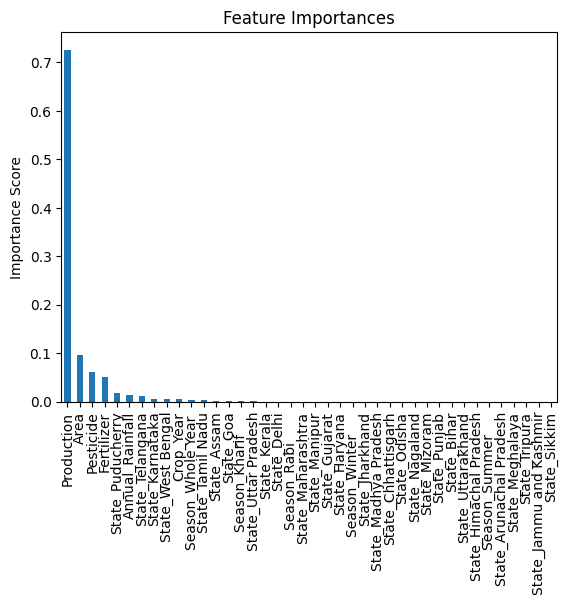

In [42]:
# 2. Feature Importance Analysis

model.fit(X, y)
importances = model.feature_importances_

feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# plot
import matplotlib.pyplot as plt
feature_importance.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance Score')
plt.show()
